In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt

# Markdown example

## log normal aerosol size distribution using standard equation as $$ N = \frac{N}{\sqrt{2\pi ln \sigma}} exp\left( -\frac{(ln X - ln (\bar{X})}{2 ln\sigma^2}\right)$$
where $X$ is size of aerosols, geometric mean $\bar{X}$, standard deviation $\sigma$, N is total aerosol concentration in \#/$cm^3$

In [3]:
def dNdlogD(n, dp, d0, std):
    """
    n is total concentration
    d size of aerosol
    d0 mean size of distribution
    std standard deviation of the log normal distribution
    """
    return n * np.log(10) / (np.sqrt(2 * sp.pi) * np.log(std)) * np.exp(-(np.log(dp) - np.log(d0)) ** 2 /
                                                                        (2 * np.log(std) ** 2))

In [4]:
def Ambient_Aerosol_distribution(Nt, dp, d0, std):
    """
    Nt is array of size of mode of distribution
    dp is distribution range
    d0 is mean size of each mode of distribution
    std is standard deviation of each mode of distribution

    return particle size distribution for a given input parameter
    """
    x = np.zeros_like(dp)
    for i in range(len(Nt)):
        y = Nt[i] / (sp.sqrt(2 * sp.pi) * sp.log10(std[i])) * sp.exp(
            -(sp.log10(dp) - sp.log10(d0[i])) ** 2 / (2 * sp.log10(std[i]) ** 2))
        x = np.vstack((x, y))
    return x.sum(axis=0)

In [33]:
dp = np.logspace(1,3, 64*3*2+1) # 3 times the normal SMPS (TSI measnurement size bin)
N = 1.0e6
dNdlndp = dNdlogD(N, dp, 100, 1.6)
dNdlndp_a = Ambient_Aerosol_distribution(np.array([2e5,1.0e5,1.0e5]), dp, np.array([60,125,250]), np.array([1.3,1.2,1.3]))

C:\Users\cbhattar\AppData\Local\Temp\ipykernel_9744\1710135605.py:12: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  y = Nt[i] / (sp.sqrt(2 * sp.pi) * sp.log10(std[i])) * sp.exp(
C:\Users\cbhattar\AppData\Local\Temp\ipykernel_9744\1710135605.py:12: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  y = Nt[i] / (sp.sqrt(2 * sp.pi) * sp.log10(std[i])) * sp.exp(
C:\Users\cbhattar\AppData\Local\Temp\ipykernel_9744\1710135605.py:13: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  -(sp.log10(dp) - sp.log10(d0[i])) ** 2 / (2 * sp.log10(std[i]) ** 2))
C:\Users\cbhattar\AppData\Local\Temp\ipykernel_9744\1710135605.py:12: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  y = Nt[i] / (sp.sqrt(2 * sp.pi) * sp.log10(std[i])) * sp.exp(


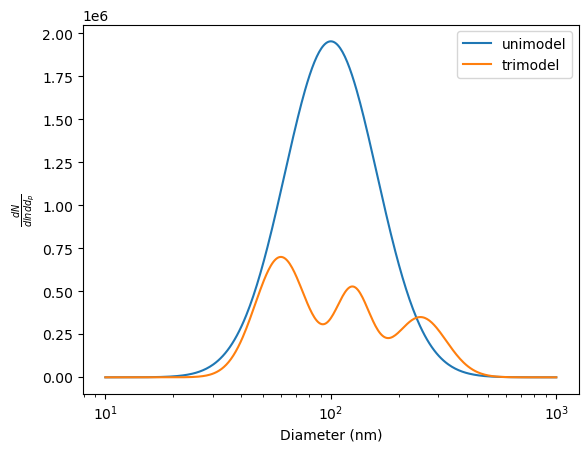

In [34]:
plt.figure()
plt.semilogx(dp,dNdlndp,label='unimodel')
plt.semilogx(dp,dNdlndp_a,label='trimodel')
plt.xlabel('Diameter (nm)')
plt.ylabel(r"$\frac{dN}{dlndd_p}$")
plt.legend()
plt.show()